In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from keras.models import load_model

import scipy.stats as stats

from itertools import combinations

from termcolor import colored

import supporter

# RMSE

In [2]:
MLP_rmse_training = pd.read_csv("./MLP_rmse_training.csv", index_col = "Pliegues")
new_column_names = ["MLP_7d_NOInf", "MLP_7d_Inf", "MLP_14d_NOInf", "MLP_14d_Inf"]
MLP_rmse_training. columns = new_column_names

CNN_rmse_training = pd.read_csv("./CNN_rmse_training.csv", index_col = "Pliegues")
new_column_names = ["CNN_7d_NOInf", "CNN_7d_Inf", "CNN_14d_NOInf", "CNN_14d_Inf"]
CNN_rmse_training. columns = new_column_names

LSTM_rmse_training = pd.read_csv("./LSTM_rmse_training.csv", index_col = "Pliegues")
new_column_names = ["LSTM_7d_NOInf", "LSTM_7d_Inf", "LSTM_14d_NOInf", "LSTM_14d_Inf"]
LSTM_rmse_training. columns = new_column_names

rmse_training = pd.concat([MLP_rmse_training, CNN_rmse_training, LSTM_rmse_training], axis=1)

In [3]:
rmse_training

,MLP_7d_NOInf,MLP_7d_Inf,MLP_14d_NOInf,MLP_14d_Inf,CNN_7d_NOInf,CNN_7d_Inf,CNN_14d_NOInf,CNN_14d_Inf,LSTM_7d_NOInf,LSTM_7d_Inf,LSTM_14d_NOInf,LSTM_14d_Inf
Pliegues,,,,,,,,,,,,
Pliegue 1,0.207055,0.135899,0.152343,0.219929,0.125461,0.146774,0.160227,0.129571,0.149822,0.132465,0.211937,0.191854
Pliegue 2,0.091041,0.085532,0.094911,0.090269,0.102432,0.128911,0.105006,0.127200,0.106760,0.158455,0.092076,0.128663
Pliegue 3,0.064571,0.058467,0.078410,0.088135,0.068416,0.077776,0.069975,0.085572,0.070034,0.078901,0.069855,0.087925
Pliegue 4,0.127292,0.128085,0.120853,0.110360,0.125108,0.106171,0.134609,0.107773,0.124849,0.110813,0.123905,0.112352
Pliegue 5,0.110007,0.098323,0.110296,0.107561,0.108748,0.100358,0.118003,0.104308,0.114415,0.096406,0.113800,0.106301
Pliegue 6,0.070862,0.073293,0.085475,0.053729,0.059099,0.055932,0.067572,0.055108,0.066137,0.053739,0.062620,0.056429
Pliegue 7,0.081666,0.098891,0.084614,0.066876,0.081111,0.070451,0.095810,0.068435,0.087394,0.070123,0.085215,0.076989
Pliegue 8,0.117522,0.107503,0.126693,0.102216,0.119484,0.092561,0.127758,0.101610,0.121758,0.109214,0.118306,0.121682
Pliegue 9,0.108329,0.096156,0.092768,0.094934,0.113783,0.097134,0.106484,0.084493,0.104258,0.112187,0.100067,0.090907


In [4]:
rmse_training.describe()

,MLP_7d_NOInf,MLP_7d_Inf,MLP_14d_NOInf,MLP_14d_Inf,CNN_7d_NOInf,CNN_7d_Inf,CNN_14d_NOInf,CNN_14d_Inf,LSTM_7d_NOInf,LSTM_7d_Inf,LSTM_14d_NOInf,LSTM_14d_Inf
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.106895,0.095537,0.102041,0.100046,0.098234,0.094502,0.106690,0.093630,0.102420,0.099268,0.104890,0.105109
std,0.040573,0.024309,0.024982,0.046161,0.024451,0.028080,0.029540,0.024769,0.026750,0.031944,0.043217,0.037714
min,0.064571,0.058467,0.074050,0.053729,0.059099,0.055932,0.067572,0.055108,0.066137,0.053739,0.062620,0.056429
25%,0.083900,0.076353,0.084829,0.072191,0.079299,0.072282,0.085044,0.075294,0.080931,0.072511,0.074641,0.080471
50%,0.099685,0.097240,0.093840,0.092602,0.105590,0.094848,0.105745,0.093591,0.105509,0.102810,0.096071,0.098604
75%,0.115643,0.105350,0.118214,0.106225,0.118059,0.104718,0.125319,0.106907,0.119922,0.111844,0.117180,0.119349
max,0.207055,0.135899,0.152343,0.219929,0.125461,0.146774,0.160227,0.129571,0.149822,0.158455,0.211937,0.191854


[Text(0.5, 0, 'Modelo'), Text(0, 0.5, 'RMSE')]

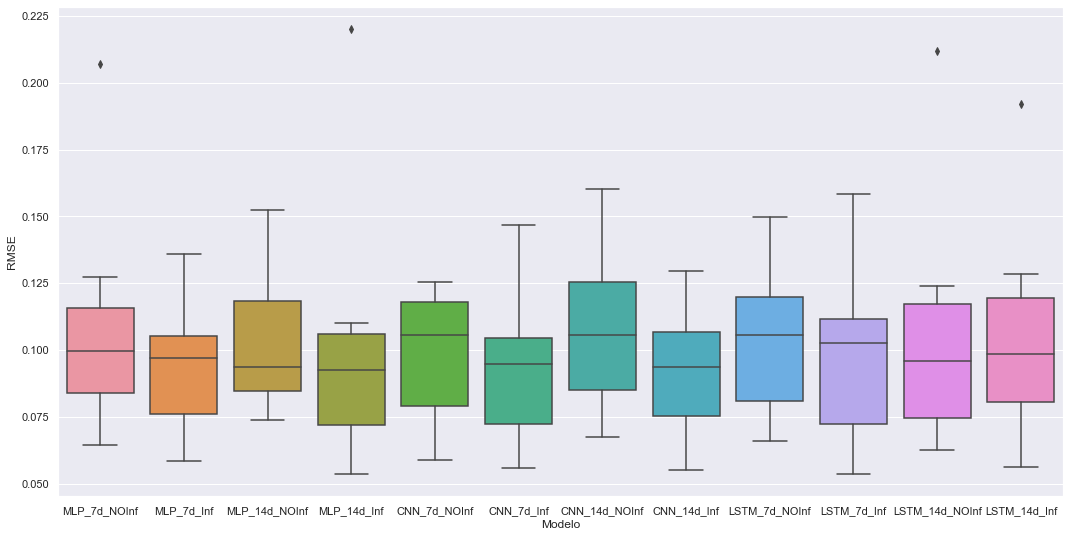

In [36]:
sns.set(rc={'figure.figsize':(18,9)})
sns.boxplot(data=rmse_training).set(xlabel='Modelo', ylabel='RMSE')

Comprobamos si las muestras proceden de una distribución normal

In [6]:
rmse_shapiro = rmse_training.apply(stats.shapiro)
rmse_shapiro.set_index([pd.Index(['Estadístico','pvalue'])],inplace = True)
rmse_shapiro

,MLP_7d_NOInf,MLP_7d_Inf,MLP_14d_NOInf,MLP_14d_Inf,CNN_7d_NOInf,CNN_7d_Inf,CNN_14d_NOInf,CNN_14d_Inf,LSTM_7d_NOInf,LSTM_7d_Inf,LSTM_14d_NOInf,LSTM_14d_Inf
Estadístico,0.832671,0.962166,0.915330,0.756321,0.903682,0.958102,0.966610,0.958452,0.961120,0.961670,0.819822,0.905730
pvalue,0.036032,0.810264,0.319647,0.004261,0.240349,0.764030,0.857761,0.768083,0.798568,0.804734,0.025217,0.252929


Existe al menos un p-valor menor que el nivel de significancia 0,05. Por tanto, una muestra no procede de una distribución normal. Podemos verlo de forma gráfica.

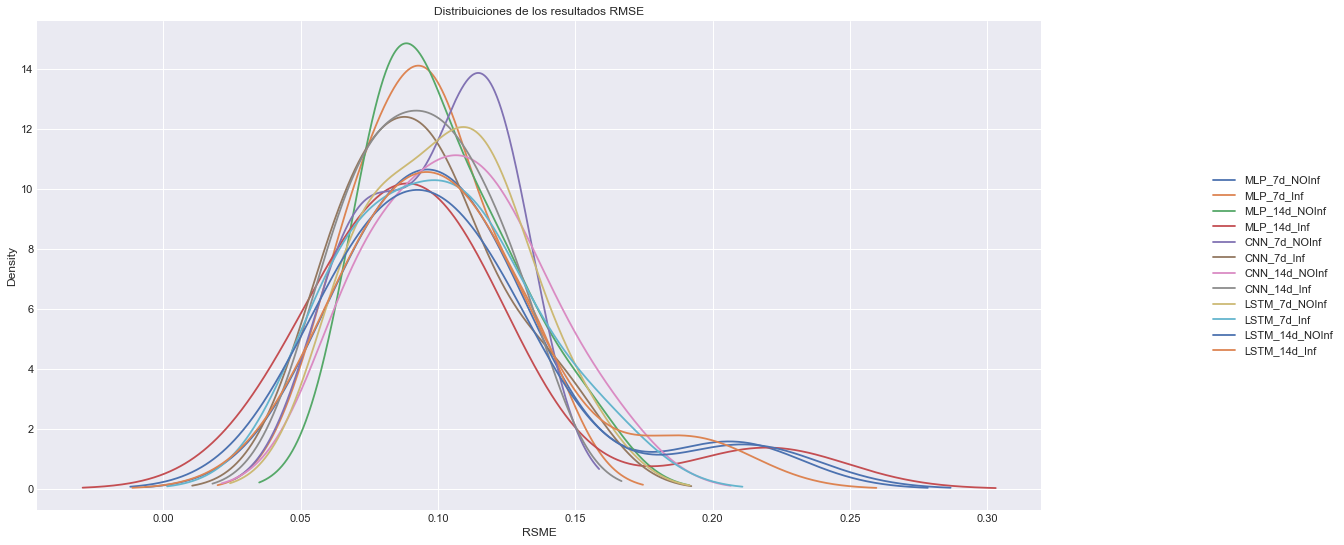

In [7]:
plt.style.use('seaborn-darkgrid')
f = plt.figure()
plt.title("Distribuiciones de los resultados RMSE")
rmse_training.plot(kind = 'density', ax = f.gca(), alpha = 1, linewidth = 1.8)
f.gca().set_xlabel('RSME')
plt.legend(loc='right', bbox_to_anchor=(1.3,0.5))

Como no todas las muestras provienen de una distribución normal, no podemos aplicar un test paramétrico. Se aplica el test de Friedman para comprobar si existe diferencia significativa entrea la muestras (modelos).

In [8]:
stats.friedmanchisquare(*[rmse_training[col] for col in rmse_training.columns])

FriedmanchisquareResult(statistic=25.923076923076962, pvalue=0.0066631204754505225)

Al tener un p-valor menor que 0.05, se puede afirmar que existen diferencias significativas entre los modelos. Llamamos a la función implementada en el módulo supporter que aplica el test de Wilcoxon.

In [9]:
ranking = supporter.pairwise_test(rmse_training, parametric=False, decreasing=True, ties= True)
ranking

,wins,ties,losses,diff
MLP_7d_NOInf,0,11,0,0
MLP_7d_Inf,0,11,0,0
MLP_14d_NOInf,0,11,0,0
MLP_14d_Inf,0,11,0,0
CNN_7d_NOInf,0,11,0,0
CNN_7d_Inf,0,11,0,0
CNN_14d_NOInf,0,11,0,0
CNN_14d_Inf,0,11,0,0
LSTM_7d_NOInf,0,11,0,0
LSTM_7d_Inf,0,11,0,0


Observando la tabla, podemos ver que no existe ningún modelo mejor que otro. Todos empatan.

# MAE

In [10]:
MLP_mae_training = pd.read_csv("./MLP_mae_training.csv", index_col = "Pliegues")
new_column_names = ["MLP_7d_NOInf", "MLP_7d_Inf", "MLP_14d_NOInf", "MLP_14d_Inf"]
MLP_mae_training. columns = new_column_names

CNN_mae_training = pd.read_csv("./CNN_mae_training.csv", index_col = "Pliegues")
new_column_names = ["CNN_7d_NOInf", "CNN_7d_Inf", "CNN_14d_NOInf", "CNN_14d_Inf"]
CNN_mae_training. columns = new_column_names

LSTM_mae_training = pd.read_csv("./LSTM_mae_training.csv", index_col = "Pliegues")
new_column_names = ["LSTM_7d_NOInf", "LSTM_7d_Inf", "LSTM_14d_NOInf", "LSTM_14d_Inf"]
LSTM_mae_training. columns = new_column_names

mae_training = pd.concat([MLP_mae_training, CNN_mae_training, LSTM_mae_training], axis=1)

In [11]:
mae_training

,MLP_7d_NOInf,MLP_7d_Inf,MLP_14d_NOInf,MLP_14d_Inf,CNN_7d_NOInf,CNN_7d_Inf,CNN_14d_NOInf,CNN_14d_Inf,LSTM_7d_NOInf,LSTM_7d_Inf,LSTM_14d_NOInf,LSTM_14d_Inf
Pliegues,,,,,,,,,,,,
Pliegue 1,0.145287,0.095367,0.118473,0.178024,0.085422,0.100721,0.116155,0.086717,0.096705,0.088703,0.147800,0.149701
Pliegue 2,0.043213,0.045379,0.041303,0.057603,0.059817,0.087314,0.050844,0.108209,0.067542,0.123437,0.043901,0.107974
Pliegue 3,0.042157,0.037988,0.051502,0.063919,0.049348,0.056445,0.047548,0.066055,0.036019,0.045968,0.039966,0.052324
Pliegue 4,0.071789,0.079684,0.087270,0.056416,0.089810,0.058134,0.090247,0.059203,0.070169,0.064991,0.076564,0.069818
Pliegue 5,0.066309,0.048922,0.064864,0.066069,0.052150,0.041371,0.073527,0.046487,0.068641,0.051350,0.068669,0.059574
Pliegue 6,0.044595,0.045100,0.065989,0.032400,0.032183,0.032657,0.038793,0.034587,0.038603,0.040444,0.039246,0.031756
Pliegue 7,0.038658,0.086893,0.050684,0.041551,0.042493,0.041599,0.054755,0.045747,0.045995,0.047883,0.049314,0.048201
Pliegue 8,0.062129,0.073952,0.084134,0.064957,0.076009,0.062027,0.070247,0.070769,0.072011,0.062575,0.069653,0.070229
Pliegue 9,0.064685,0.064708,0.056328,0.063302,0.069093,0.066239,0.067986,0.056273,0.063279,0.080497,0.074276,0.058688


In [12]:
mae_training.describe()

,MLP_7d_NOInf,MLP_7d_Inf,MLP_14d_NOInf,MLP_14d_Inf,CNN_7d_NOInf,CNN_7d_Inf,CNN_14d_NOInf,CNN_14d_Inf,LSTM_7d_NOInf,LSTM_7d_Inf,LSTM_14d_NOInf,LSTM_14d_Inf
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.063880,0.061815,0.065872,0.065672,0.059744,0.057956,0.065048,0.061498,0.060140,0.063384,0.064751,0.068148
std,0.030951,0.021035,0.024627,0.041598,0.019678,0.022562,0.024190,0.022553,0.019075,0.027910,0.033021,0.035901
min,0.038658,0.037988,0.038171,0.032400,0.032183,0.032657,0.038793,0.034587,0.036019,0.027990,0.038122,0.031756
25%,0.043558,0.045170,0.050888,0.045267,0.044207,0.041428,0.048372,0.045932,0.043325,0.046447,0.040949,0.049231
50%,0.061053,0.056815,0.060596,0.060453,0.055984,0.057289,0.061371,0.057738,0.065411,0.056963,0.058991,0.059131
75%,0.065903,0.078251,0.079598,0.064698,0.074280,0.065186,0.072707,0.069591,0.069787,0.076621,0.073120,0.070126
max,0.145287,0.095367,0.118473,0.178024,0.089810,0.100721,0.116155,0.108209,0.096705,0.123437,0.147800,0.149701


[Text(0.5, 0, 'Modelo'), Text(0, 0.5, 'MAE')]

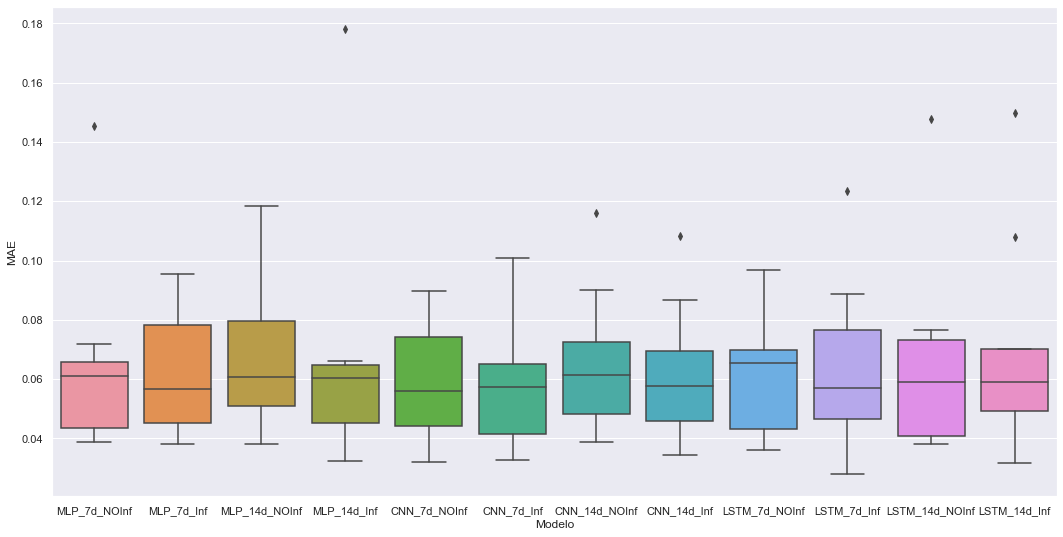

In [13]:
sns.set(rc={'figure.figsize':(18,9)})
sns.boxplot(data=mae_training).set(xlabel='Modelo', ylabel='MAE')

Comprobamos si las muestras proceden de una distribución normal

In [14]:
mae_shapiro = mae_training.apply(stats.shapiro)
mae_shapiro.set_index([pd.Index(['Estadístico','pvalue'])],inplace = True)
mae_shapiro

,MLP_7d_NOInf,MLP_7d_Inf,MLP_14d_NOInf,MLP_14d_Inf,CNN_7d_NOInf,CNN_7d_Inf,CNN_14d_NOInf,CNN_14d_Inf,LSTM_7d_NOInf,LSTM_7d_Inf,LSTM_14d_NOInf,LSTM_14d_Inf
Estadístico,0.713405,0.899460,0.910118,0.651943,0.950387,0.916777,0.911143,0.928154,0.913817,0.926310,0.762296,0.847734
pvalue,0.001281,0.216125,0.281801,0.000232,0.673075,0.330855,0.288935,0.429986,0.308255,0.412597,0.005038,0.054590


Existe al menos un p-valor menor que el nivel de significancia 0,05. Por tanto, una muestra no procede de una distribución normal. Podemos verlo de forma gráfica.

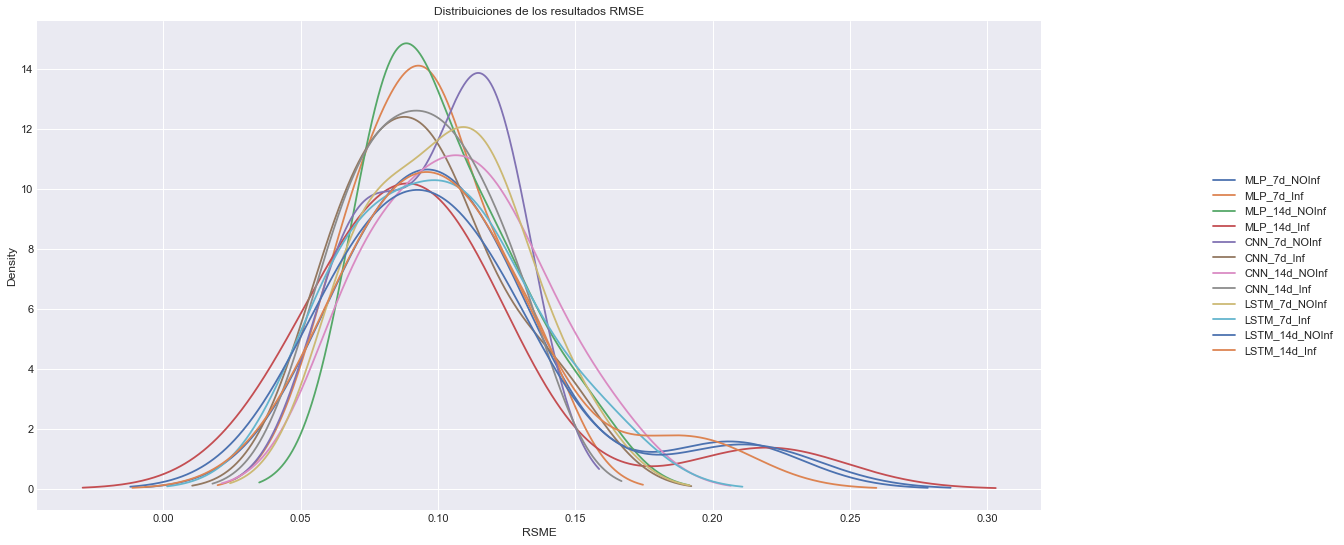

In [15]:
plt.style.use('seaborn-darkgrid')
f = plt.figure()
plt.title("Distribuiciones de los resultados RMSE")
rmse_training.plot(kind = 'density', ax = f.gca(), alpha = 1, linewidth = 1.8)
f.gca().set_xlabel('RSME')
plt.legend(loc='right', bbox_to_anchor=(1.3,0.5))

Como no todas las muestra provienen de una distribución normal, no podemos aplicar un test paramétrico. Se aplica el test de Friedman para comprobar si existe diferencia significativa entrea la muestras (modelos).

In [16]:
stats.friedmanchisquare(*[mae_training[col] for col in mae_training.columns])

FriedmanchisquareResult(statistic=8.49230769230769, pvalue=0.6686420802922437)

Al tener un p-valor mayor que 0.05, no podemos garantizar que existan diferencias significativas entre los modelos.

# MAPE

In [17]:
MLP_mape_training = pd.read_csv("./MLP_mape_training.csv", index_col = "Pliegues")
new_column_names = ["MLP_7d_NOInf", "MLP_7d_Inf", "MLP_14d_NOInf", "MLP_14d_Inf"]
MLP_mape_training. columns = new_column_names

CNN_mape_training = pd.read_csv("./CNN_mape_training.csv", index_col = "Pliegues")
new_column_names = ["CNN_7d_NOInf", "CNN_7d_Inf", "CNN_14d_NOInf", "CNN_14d_Inf"]
CNN_mape_training. columns = new_column_names

LSTM_mape_training = pd.read_csv("./LSTM_mape_training.csv", index_col = "Pliegues")
new_column_names = ["LSTM_7d_NOInf", "LSTM_7d_Inf", "LSTM_14d_NOInf", "LSTM_14d_Inf"]
LSTM_mape_training. columns = new_column_names

mape_training = pd.concat([MLP_mape_training, CNN_mape_training, LSTM_mape_training], axis=1)

In [18]:
mape_training

,MLP_7d_NOInf,MLP_7d_Inf,MLP_14d_NOInf,MLP_14d_Inf,CNN_7d_NOInf,CNN_7d_Inf,CNN_14d_NOInf,CNN_14d_Inf,LSTM_7d_NOInf,LSTM_7d_Inf,LSTM_14d_NOInf,LSTM_14d_Inf
Pliegues,,,,,,,,,,,,
Pliegue 1,35.121298,27.776920,28.985990,35.751165,26.154154,27.723329,27.832928,28.427078,29.295639,27.836583,35.109192,34.248660
Pliegue 2,36.896019,40.949707,37.790563,47.844968,56.330559,65.248286,46.105008,90.138683,54.359513,111.844841,38.069582,96.896057
Pliegue 3,28.795469,24.376163,28.547476,37.695724,30.836490,31.038896,27.346720,34.562833,25.572951,30.823388,24.549833,34.468795
Pliegue 4,28.655918,25.488474,29.991725,20.793349,31.086477,22.602800,32.360655,22.686976,28.745217,21.552296,28.245936,27.805091
Pliegue 5,22.229576,18.688395,23.415561,21.876643,20.666315,15.683449,23.666621,17.840995,21.921527,17.990426,22.898680,20.968830
Pliegue 6,72.840085,54.771911,95.726402,43.085799,49.786365,37.818197,63.461582,43.450277,59.960492,56.553906,64.743611,50.178295
Pliegue 7,37.943305,89.521716,50.032752,35.778857,39.280680,43.594028,46.962286,46.299219,40.706263,48.885086,50.489581,52.441760
Pliegue 8,16.063870,13.987420,15.765416,12.995771,15.983944,12.373584,16.482464,13.755855,15.638923,13.700407,15.125908,14.936885
Pliegue 9,32.270667,28.264198,26.266068,26.974820,34.499396,23.144803,33.069777,19.952993,30.183219,27.060614,28.994693,23.432396


In [19]:
mape_training.describe()

,MLP_7d_NOInf,MLP_7d_Inf,MLP_14d_NOInf,MLP_14d_Inf,CNN_7d_NOInf,CNN_7d_Inf,CNN_14d_NOInf,CNN_14d_Inf,LSTM_7d_NOInf,LSTM_7d_Inf,LSTM_14d_NOInf,LSTM_14d_Inf
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,38.640490,37.950503,38.619419,32.304724,35.441341,32.170328,37.309887,36.892567,36.438299,40.224858,35.931693,40.402751
std,19.907868,22.968659,22.825609,11.137380,13.278788,15.707526,15.085645,22.738367,15.875513,28.802312,15.335352,23.678373
min,16.063870,13.987420,15.765416,12.995771,15.983944,12.373584,16.482464,13.755855,15.638923,13.700407,15.125908,14.936885
25%,28.690806,24.654240,26.836420,23.151187,27.324738,22.738301,27.468272,20.636488,26.366018,22.929375,25.473859,24.525569
50%,33.695983,28.020559,29.488858,35.765011,32.792936,29.381113,32.715216,31.494955,29.739429,29.329986,32.051943,34.358728
75%,37.681483,51.316360,46.701819,39.611542,47.159944,41.311477,46.747966,45.586984,50.946200,48.164073,47.384581,49.796406
max,75.588695,89.521716,95.726402,47.844968,56.330559,65.248286,63.461582,90.138683,59.960492,111.844841,64.743611,96.896057


[Text(0.5, 0, 'Modelo'), Text(0, 0.5, 'MAE')]

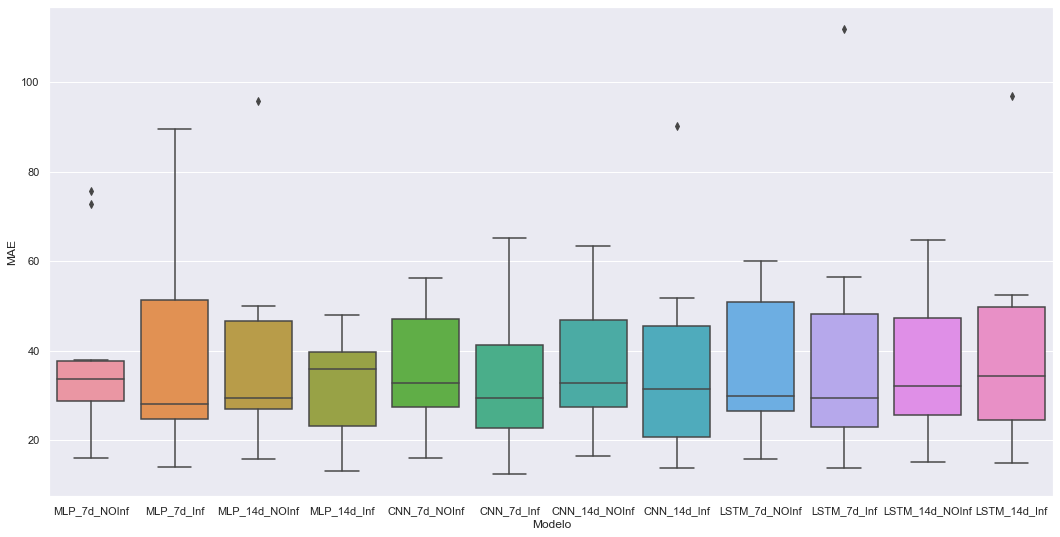

In [20]:
sns.set(rc={'figure.figsize':(18,9)})
sns.boxplot(data=mape_training).set(xlabel='Modelo', ylabel='MAPE')

Comprobamos si las muestras proceden de una distribución normal

In [21]:
mape_shapiro = mape_training.apply(stats.shapiro)
mape_shapiro.set_index([pd.Index(['Estadístico','pvalue'])],inplace = True)
mape_shapiro

,MLP_7d_NOInf,MLP_7d_Inf,MLP_14d_NOInf,MLP_14d_Inf,CNN_7d_NOInf,CNN_7d_Inf,CNN_14d_NOInf,CNN_14d_Inf,LSTM_7d_NOInf,LSTM_7d_Inf,LSTM_14d_NOInf,LSTM_14d_Inf
Estadístico,0.814469,0.860992,0.788959,0.950981,0.956838,0.940994,0.945385,0.864893,0.891597,0.800261,0.946227,0.854812
pvalue,0.021722,0.078392,0.010642,0.680111,0.749305,0.564129,0.614331,0.087122,0.176734,0.014605,0.624123,0.066259


Existe al menos un p-valor menor que el nivel de significancia 0,05. Por tanto, una muestra no procede de una distribución normal. Podemos verlo de forma gráfica.

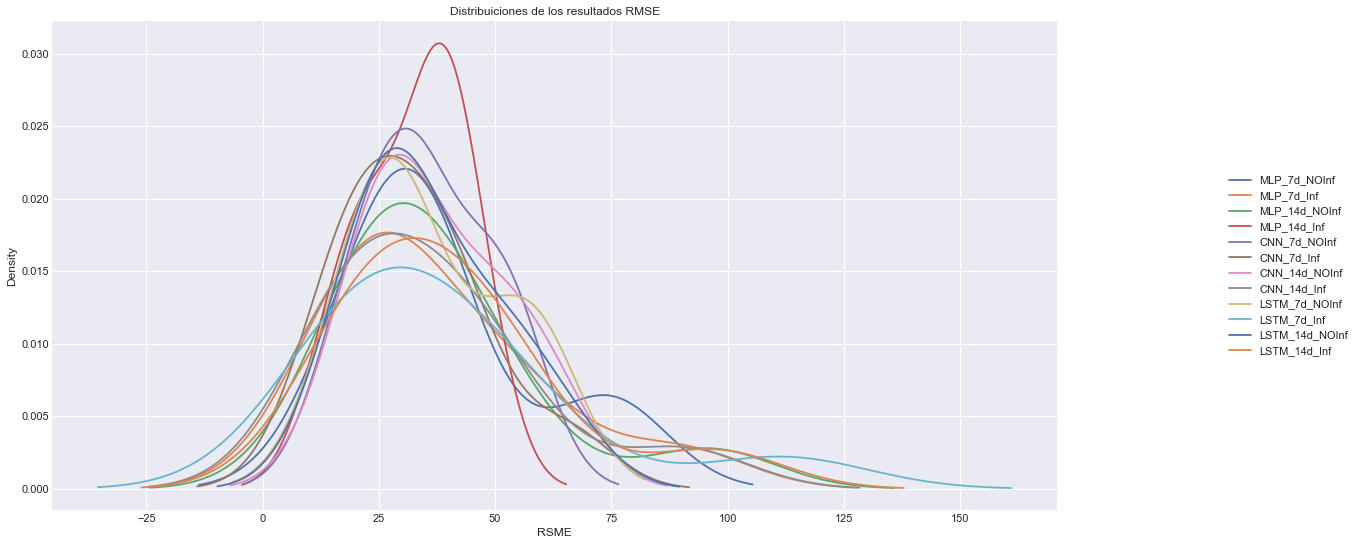

In [22]:
plt.style.use('seaborn-darkgrid')
f = plt.figure()
plt.title("Distribuiciones de los resultados RMSE")
mape_training.plot(kind = 'density', ax = f.gca(), alpha = 1, linewidth = 1.8)
f.gca().set_xlabel('RSME')
plt.legend(loc='right', bbox_to_anchor=(1.3,0.5))

Como no todas las muestras provienen de una distribución normal, no podemos aplicar un test paramétrico. Se aplica el test de Friedman para comprobar si existe diferencia significativa entrea la muestras (modelos).

In [23]:
stats.friedmanchisquare(*[mape_training[col] for col in mape_training.columns])

FriedmanchisquareResult(statistic=18.63076923076926, pvalue=0.06805196220779197)

Al tener un p-valor mayor que 0.05, no podemos garantizar que existan diferencias significativas entre los modelos.

#### Conclusiones de los tests estadísticos con los errores cometidos durante el entrenamiento
- Se han aplicado diferentes test estadísticos no paramétricos, pues no todas las muestras siguen una distribución normal.
- En el caso de RMSE, el test de Friedman indicaba que existían diferencias significativas entre los modelos; sin embargo, el test de wilcoxon no pudo detectar ningún modelo con mejor rendimiento que los demás.
- En el caso de MAE y MAPE, el test de Friedman indicaba que no existía diferencia significativa entre los modelos.
- Por tanto, estos test estadísticos no son concluyentes. Pasamos a aplicar el algoritmo de decisión multicriterio sobre los errores en las predicciones en el conjunto de datos de test.

# Algoritmo de decisión multicriterio

In [24]:
errores_df = pd.DataFrame(columns=["RMSE","MAE","MAPE"])
modelos = []

In [25]:
#Porcentaje de los datos de entrenamiento
train_size=0.8
#Porcentaje de los datos de Test
test_size=0.2

### Modelos con conjunto de datos 7 días sin información diaria

In [26]:
df_7d_no_info = pd.read_csv(r'./consumo_diario_03_7d_no_info.csv',parse_dates=["Fecha"], index_col=["Fecha"])
_, X_test_7d_no_info, _, y_test_true = supporter.split_train_test(df_7d_no_info,
                                                train_size_=train_size,test_size_=test_size,scale=True,verbose=False)


# MLP
clf_mlp_7d_no_info_normalizado = joblib.load('mlp_7d_no_info_normalizado_clf.pkl')
predictor_mlp_7d_no_info = clf_mlp_7d_no_info_normalizado.best_estimator_
y_pred_mlp_7d_no_info = predictor_mlp_7d_no_info.predict(X_test_7d_no_info)
mlp_7d_no_info_rmse_test, mlp_7d_no_info_mae_test, mlp_7d_no_info_mape_test=supporter.get_test_prediction_errors(y_test_true,
                                                                                                        y_pred_mlp_7d_no_info)
errores_df.loc['MLP_7d_no_info'] = [mlp_7d_no_info_rmse_test, mlp_7d_no_info_mae_test, mlp_7d_no_info_mape_test]
modelos.append('MLP_7d_no_info')

# CNN
predictor_cnn_7d_no_info = load_model('CNN_7d_no_info_normalizado_best_model.h5')
y_pred_cnn_7d_no_info = predictor_cnn_7d_no_info.predict(X_test_7d_no_info)
cnn_7d_no_info_rmse_test, cnn_7d_no_info_mae_test, cnn_7d_no_info_mape_test=supporter.get_test_prediction_errors(y_test_true,
                                                                                                        y_pred_cnn_7d_no_info)
errores_df.loc['CNN_7d_no_info'] = [cnn_7d_no_info_rmse_test, cnn_7d_no_info_mae_test, cnn_7d_no_info_mape_test]
modelos.append('CNN_7d_no_info')

# LSTM
predictor_lstm_7d_no_info = load_model('LSTM_7d_no_info_normalizado_best_model.h5')
y_pred_lstm_7d_no_info = predictor_lstm_7d_no_info.predict(X_test_7d_no_info)
lstm_7d_no_info_rmse_test, lstm_7d_no_info_mae_test, lstm_7d_no_info_mape_test=supporter.get_test_prediction_errors(y_test_true,
                                                                                                        y_pred_lstm_7d_no_info)
errores_df.loc['LSTM_7d_no_info'] = [lstm_7d_no_info_rmse_test, lstm_7d_no_info_mae_test, lstm_7d_no_info_mape_test]
modelos.append('LSTM_7d_no_info')

### Modelos con conjunto de datos 7 días con información diaria

In [27]:
df_7d_info = pd.read_csv(r'./consumo_diario_03_7d_info.csv',parse_dates=["Fecha"], index_col=["Fecha"])
_, X_test_7d_info, _, y_test_true = supporter.split_train_test(df_7d_info,
                                                train_size_=train_size,test_size_=test_size,scale=True,verbose=False)


# MLP
clf_mlp_7d_info_normalizado = joblib.load('mlp_7d_info_normalizado_clf.pkl')
predictor_mlp_7d_info = clf_mlp_7d_info_normalizado.best_estimator_
y_pred_mlp_7d_info = predictor_mlp_7d_info.predict(X_test_7d_info)
mlp_7d_info_rmse_test, mlp_7d_info_mae_test, mlp_7d_info_mape_test=supporter.get_test_prediction_errors(y_test_true,
                                                                                                        y_pred_mlp_7d_info)
errores_df.loc['MLP_7d_info'] = [mlp_7d_info_rmse_test, mlp_7d_info_mae_test, mlp_7d_info_mape_test]
modelos.append('MLP_7d_info')

# CNN
predictor_cnn_7d_info = load_model('CNN_7d_info_normalizado_best_model.h5')
y_pred_cnn_7d_info = predictor_cnn_7d_info.predict(X_test_7d_info)
cnn_7d_info_rmse_test, cnn_7d_info_mae_test, cnn_7d_info_mape_test=supporter.get_test_prediction_errors(y_test_true,
                                                                                                        y_pred_cnn_7d_info)
errores_df.loc['CNN_7d_info'] = [cnn_7d_info_rmse_test, cnn_7d_info_mae_test, cnn_7d_info_mape_test]
modelos.append('CNN_7d_info')

# LSTM
predictor_lstm_7d_info = load_model('LSTM_7d_info_normalizado_best_model.h5')
y_pred_lstm_7d_info = predictor_lstm_7d_info.predict(X_test_7d_info)
lstm_7d_info_rmse_test, lstm_7d_info_mae_test, lstm_7d_info_mape_test=supporter.get_test_prediction_errors(y_test_true,
                                                                                                        y_pred_lstm_7d_info)
errores_df.loc['LSTM_7d_info'] = [lstm_7d_info_rmse_test, lstm_7d_info_mae_test, lstm_7d_info_mape_test]
modelos.append('LSTM_7d_info')

### Modelos con conjunto de datos 14 días sin información diaria

In [28]:
df_14d_no_info = pd.read_csv(r'./consumo_diario_03_14d_no_info.csv',parse_dates=["Fecha"], index_col=["Fecha"])
_, X_test_14d_no_info, _, y_test_true = supporter.split_train_test(df_14d_no_info,
                                                train_size_=train_size,test_size_=test_size,scale=True,verbose=False)


# MLP
clf_mlp_14d_no_info_normalizado = joblib.load('mlp_14d_no_info_normalizado_clf.pkl')
predictor_mlp_14d_no_info = clf_mlp_14d_no_info_normalizado.best_estimator_
y_pred_mlp_14d_no_info = predictor_mlp_14d_no_info.predict(X_test_14d_no_info)
mlp_14d_no_info_rmse_test, mlp_14d_no_info_mae_test, mlp_14d_no_info_mape_test=supporter.get_test_prediction_errors(y_test_true,
                                                                                                        y_pred_mlp_14d_no_info)
errores_df.loc['MLP_14d_no_info'] = [mlp_14d_no_info_rmse_test, mlp_14d_no_info_mae_test, mlp_14d_no_info_mape_test]
modelos.append('MLP_14d_no_info')

# CNN
predictor_cnn_14d_no_info = load_model('CNN_14d_no_info_normalizado_best_model.h5')
y_pred_cnn_14d_no_info = predictor_cnn_14d_no_info.predict(X_test_14d_no_info)
cnn_14d_no_info_rmse_test, cnn_14d_no_info_mae_test, cnn_14d_no_info_mape_test=supporter.get_test_prediction_errors(y_test_true,
                                                                                                        y_pred_cnn_14d_no_info)
errores_df.loc['CNN_14d_no_info'] = [cnn_14d_no_info_rmse_test, cnn_14d_no_info_mae_test, cnn_14d_no_info_mape_test]
modelos.append('CNN_14d_no_info')

# LSTM
predictor_lstm_14d_no_info = load_model('LSTM_14d_no_info_normalizado_best_model.h5')
y_pred_lstm_14d_no_info = predictor_lstm_14d_no_info.predict(X_test_14d_no_info)
lstm_14d_no_info_rmse_test, lstm_14d_no_info_mae_test, lstm_14d_no_info_mape_test=supporter.get_test_prediction_errors(y_test_true,
                                                                                                        y_pred_lstm_14d_no_info)
errores_df.loc['LSTM_14d_no_info'] = [lstm_14d_no_info_rmse_test, lstm_14d_no_info_mae_test, lstm_14d_no_info_mape_test]
modelos.append('LSTM_14d_no_info')

### Modelos con conjunto de datos 14 días con información diaria

In [29]:
df_14d_info = pd.read_csv(r'./consumo_diario_03_14d_info.csv',parse_dates=["Fecha"], index_col=["Fecha"])
_, X_test_14d_info, _, y_test_true = supporter.split_train_test(df_14d_info,
                                                train_size_=train_size,test_size_=test_size,scale=True,verbose=False)


# MLP
clf_mlp_14d_info_normalizado = joblib.load('mlp_14d_info_normalizado_clf.pkl')
predictor_mlp_14d_info = clf_mlp_14d_info_normalizado.best_estimator_
y_pred_mlp_14d_info = predictor_mlp_14d_info.predict(X_test_14d_info)
mlp_14d_info_rmse_test, mlp_14d_info_mae_test, mlp_14d_info_mape_test=supporter.get_test_prediction_errors(y_test_true,
                                                                                                        y_pred_mlp_14d_info)
errores_df.loc['MLP_14d_info'] = [mlp_14d_info_rmse_test, mlp_14d_info_mae_test, mlp_14d_info_mape_test]
modelos.append('MLP_14d_info')

# CNN
predictor_cnn_14d_info = load_model('CNN_14d_info_normalizado_best_model.h5')
y_pred_cnn_14d_info = predictor_cnn_14d_info.predict(X_test_14d_info)
cnn_14d_info_rmse_test, cnn_14d_info_mae_test, cnn_14d_info_mape_test=supporter.get_test_prediction_errors(y_test_true,
                                                                                                        y_pred_cnn_14d_info)
errores_df.loc['CNN_14d_info'] = [cnn_14d_info_rmse_test, cnn_14d_info_mae_test, cnn_14d_info_mape_test]
modelos.append('CNN_14d_info')

# LSTM
predictor_lstm_14d_info = load_model('LSTM_14d_info_normalizado_best_model.h5')
y_pred_lstm_14d_info = predictor_lstm_14d_info.predict(X_test_14d_info)
lstm_14d_info_rmse_test, lstm_14d_info_mae_test, lstm_14d_info_mape_test=supporter.get_test_prediction_errors(y_test_true,
                                                                                                        y_pred_lstm_14d_info)
errores_df.loc['LSTM_14d_info'] = [lstm_14d_info_rmse_test, lstm_14d_info_mae_test, lstm_14d_info_mape_test]
modelos.append('LSTM_14d_info')

In [30]:
errores_df

,RMSE,MAE,MAPE
MLP_7d_no_info,0.111339,0.077430,21.873681
CNN_7d_no_info,0.113316,0.080396,22.711581
LSTM_7d_no_info,0.114362,0.079640,22.498138
MLP_7d_info,0.110612,0.079013,22.320905
CNN_7d_info,0.095830,0.068439,19.333939
LSTM_7d_info,0.100009,0.072110,20.370920
MLP_14d_no_info,0.116860,0.088553,25.002777
CNN_14d_no_info,0.119335,0.086011,24.285011
LSTM_14d_no_info,0.110817,0.077746,21.951502
MLP_14d_info,0.099591,0.071753,20.259389


In [33]:
minimo = errores_df.min()
minimo_rmse = minimo[0]
minimo_mae = minimo[1]
minimo_mape = minimo[2]

maximo = errores_df.max()
maximo_rmse = maximo[0]
maximo_mae = maximo[1]
maximo_mape = maximo[2]

errores_norm = pd.DataFrame(columns=["RMSE","MAE","MAPE", "Total"])

# Para cada modelo
for model in modelos:
    
    # Se normalizan las medidas de error
    norm_rmse = (errores_df.loc[model].RMSE - minimo_rmse)/(maximo_rmse - minimo_rmse)
    norm_mae = (errores_df.loc[model].MAE - minimo_mae)/(maximo_mae - minimo_mae)
    norm_mape = (errores_df.loc[model].MAPE - minimo_mape)/(maximo_mape - minimo_mape)
    
    suma_errores = norm_rmse + norm_mae + norm_mape

    errores_norm.loc[model] = [norm_rmse, norm_mae, norm_mape, suma_errores]

In [35]:
errores_norm = errores_norm.sort_values(by=['Total'])
errores_norm

,RMSE,MAE,MAPE,Total
CNN_7d_info,0.000000,0.000000,0.000000,0.000000
MLP_14d_info,0.159984,0.164764,0.163252,0.488000
LSTM_7d_info,0.177788,0.182499,0.182926,0.543213
CNN_14d_info,0.168295,0.224073,0.222669,0.615037
MLP_7d_no_info,0.659808,0.446971,0.448018,1.554798
LSTM_14d_no_info,0.637604,0.462718,0.461746,1.562069
LSTM_14d_info,0.546669,0.527772,0.526917,1.601359
MLP_7d_info,0.628879,0.525679,0.526910,1.681467
LSTM_7d_no_info,0.788426,0.556870,0.558174,1.903471
CNN_7d_no_info,0.743930,0.594434,0.595826,1.934190
